This script visualizes daily temperatures calculated using driver data from the example folder and measured data from the corresponding permafrost monitoring station. 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Here we load calculated temperatures and measured data. The length of the time series defined by the length of the calculated time series (denoted by n1). In our case its 1 yr (365 days). 

In [2]:
calc_file='examples/out/result.txt'
calc_data = np.loadtxt(calc_file, skiprows=1,  unpack=False)
meas_file='examples/mesres.txt'
meas_data=np.loadtxt(meas_file, skiprows=2,  unpack=False)
[n1,n2]=np.shape(calc_data) # n1: time series lenght; n2: number cols in the file
[n3,n4]=np.shape(meas_data) # n3: time series lenght; n4: number of measurements
print n1,n2
print n3,n4

365 16
1831 13


Load grid file and set grid and vizualization depths

In [3]:
grid_file='examples/grid.txt'
grid_data = np.loadtxt(grid_file, comments='#',  unpack=False)
m=int(grid_data[0])                 # number of vertical grid points
                                    # Note: grid runs from grid_data[1] not o  
nm= int(grid_data[m+1])             # number of output grid point 
ind=np.zeros(nm)
ind=map(int, grid_data[m+1:m+nm+1]) # indexes of output points
print 'output depth values:'
print grid_data[ind]                # visualized grid points (depths)
print 'number of viz depth:',len(ind)

output depth values:
[-0.95   0.001  0.08   0.12   0.2    0.28   0.36   0.42   0.5    0.58   0.74
  0.88 ]
number of viz depth: 12


Matching up measured and calculated results with the corresponding depth

In [4]:
calc_tair=calc_data[:,2]
calc_snd=calc_data[:,3]
calc_viz=calc_data[:,4:n2]
meas_tair=meas_data[:,0]
meas_viz=meas_data[0:n1,1:n4]
print 'calculated and measured air temps'
print calc_tair[0],meas_tair[0]
print 'calculated and measured temps at depth:',grid_data[ind[1]] 
print calc_viz[0:2,0],meas_viz[0:2,0]
print 'calculated and measured temps at depth:',grid_data[ind[11]] 
print calc_viz[0:2,11],meas_viz[0:2,11]

calculated and measured air temps
2.861 2.861
calculated and measured temps at depth: 0.001
[ 3.992       2.62390236] [ 3.992  3.952]
calculated and measured temps at depth: 0.88
[-2.945      -2.58700844] [-2.945 -2.917]


Visualizing measured and calculated data

In [5]:
def plot_meas_vs_calc(calc,meas,vdepth):
    plt.plot(calc,'b',meas,'r--',linewidth=2.0)
    RMSE=np.sqrt(np.mean((calc-meas)**2))
    plt.title('depth:'+str(vdepth)+',  RMSE:'+str(round(RMSE,3)),fontsize=16 )
    plt.xlim([0, len(calc_viz)]);
    plt.ylabel('temperatures [C]', fontsize=16);
    plt.xlabel('time [days]',  fontsize=16);
    plt.tick_params(labelsize=16)

Ploting measured (in dash red) and calculated (is solid blue) temprature time series.

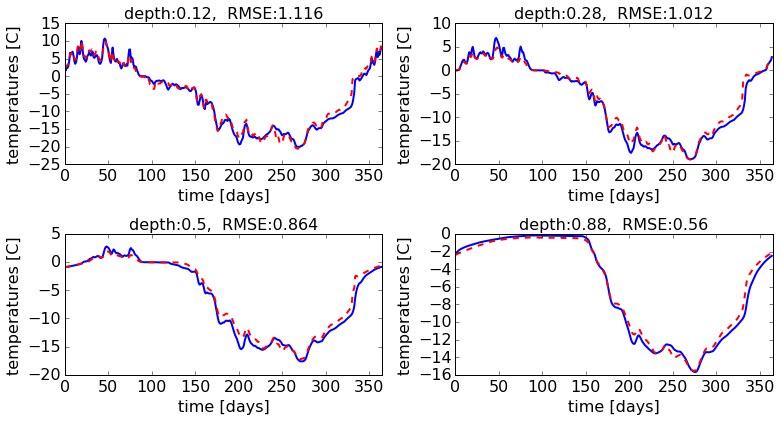

In [6]:
fig = plt.figure()
fig.set_figheight(6); fig.set_figwidth(11)
ii=[3,5,8,11] # visualizing for depth index ii, where ii in [1,11]
for i in range(4):
    k=ii[i]
    fig.add_subplot(2,2,i+1)
    plot_meas_vs_calc(calc_viz[:,k-1],meas_viz[:,k-1],grid_data[ind[k]])
fig.tight_layout()